<a href="https://colab.research.google.com/github/devadathprabhu/DSC612/blob/main/L6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

!pip install np_utils

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 61 kB 3.2 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=e11b80bb2fe59f897253573dbbd48cbbba489d605680ae994cee6334f422ecfc
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/DL/train/'
TEST_DIR = '/content/drive/MyDrive/DL/test/'

ROWS = 32
COLS = 32
CHANNELS = 3

In [ ]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [ ]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [ ]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [ ]:
x_train, y_train = prep_data(train_images)

X.shape is (615, 32, 32, 3)
Proceed 0 of 615


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=.4)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2)
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((295, 32, 32, 3), (295, 2))
((74, 32, 32, 3), (74, 2))
((246, 32, 32, 3), (246, 2))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=2, 
                                     horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2, 
                                   horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, 
                                    horizontal_flip= True,zoom_range=.1)
#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96,input_shape=(32,32,3),kernel_size=(11,11),
                   strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization_9 (Batc  (None, 8, 8, 96)         384       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_10 (Bat  (None, 4, 4, 256)       

In [ ]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy,
                optimizer= 'adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)
#Defining the parameters
batch_size=15
epochs=20
learn_rate=.001

In [ ]:
AlexNet.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
     epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size,
      validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
       validation_steps = 250, callbacks = [lrr], verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
19/19 [==============================] - 8s 446ms/step - loss: 0.6642 - accuracy: 0.6143 - val_loss: 28.5806 - val_accuracy: 0.3919 - lr: 0.0010
Epoch 2/20
19/19 [==============================] - 8s 421ms/step - loss: 0.6702 - accuracy: 0.5893 - lr: 0.0010
Epoch 3/20
19/19 [==============================] - 8s 429ms/step - loss: 0.6532 - accuracy: 0.6357 - lr: 0.0010
Epoch 4/20
19/19 [==============================] - 8s 420ms/step - loss: 0.6162 - accuracy: 0.6929 - lr: 0.0010
Epoch 5/20
19/19 [==============================] - 8s 425ms/step - loss: 0.5875 - accuracy: 0.7053 - lr: 0.0010
Epoch 6/20
19/19 [==============================] - 8s 425ms/step - loss: 0.5967 - accuracy: 0.6821 - lr: 0.0010
Epoch 7/20
19/19 [==============================] - 8s 427ms/step - loss: 0.5766 - accuracy: 0.7214 - lr: 0.0010
Epoch 8/20
19/19 [==============================] - 8s 423ms/step - loss: 0.5366 - accuracy: 0.7536 - lr: 0.0010
Epoch 9/20
19/19 [==============================] - 8

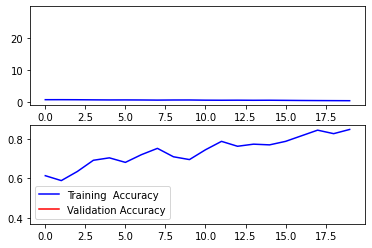

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()